## Analyzing Effects of Gentrification in San Diego -  A close look at the changes in Population, Income & Property Value in San Diego.

### Arkin Gupta
B.S in Mathematics-Computer Science at UC San Diego <br>
Website: http://arkin.xyz; E-mail: arkin.gupta@gmail.com 

### Zaki Siddiqui 
B.S in Computer Science at UC San Diego, La Jolla <br> 
E-mail: zsiddiqui@ucsd.edu 

### Luyanda Mdanda 
B.S in Cognitive Science at UC San Diego, La Jolla <br>
E-mail: arkin.gupta@gmail.com 

## Introduction
Through this project, we aspire to analyze and determine the major effects of <b>gentrification</b> in San Diego, and determine the regions/neighborhoods effected most by it.

<b>What is Gentrification?</b>
Gentrification is the process of renovating and improving a neighborhood or district so that it conforms to middle-class standards. 

<b>How do we plan to analyze Gentrification?</b>
Gentrification has multiple negative effects, including poverty, homelessness and mass displacement. These factors, are specifically due to one of Gentrification’s implications - Change (Increase) in Property Value. We believe that Property value is the reason for negative effects on Population, Income and Poverty.
<i>Hence, we plan to analyze the effects of Gentrification by analyzing Property value change, and it's effects.</i>


We chose to look at the Census data along with the Land Prices in San Diego to get an overview on how the changes in property values in San Diego have effected certain living standards and metrics, such as <u>education level, poverty and unemployment rates</u>. We also analyze and graph Property value data (by Zillow) to gain more insight. All of this data will be looked at across a period of time (<i>approximately 2007 - present</i>).

## Setting Up the Tools

In [1]:
#Importing Required Libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm

# Importing and Cleaning the Data
Since we’re working with multiple data sets (with numerous features), from varying time frames, there is a significant amount of Data Cleaning required in this project. We’ll be dropping columns that we don’t intuitively feel correlate and are unrelated with gentrification, and, moreover, we’ll be merging a few datasets along the timeframe. 

In [2]:
#Importing Time Series Data for multiple aspects of San Diego
df_age = pd.read_excel("sandag.xlsx", sheetname="Age")
df_eth = pd.read_excel("sandag.xlsx", sheetname="Ethnicity")
df_house = pd.read_excel("sandag.xlsx", sheetname="Housing")
df_pop = pd.read_excel("sandag.xlsx", sheetname="Population")
df_income = pd.read_excel("sandag.xlsx", sheetname="Income")

#Reading census data
census_df = pd.read_excel('SD.xlsx')
#Cleaning census data & taking relevant features
census_df = census_df[['NeighborhoodName','TotalPopulation', 'PovertyRt', 'Unemployment', 'Uninsured']]
census_df = census_df.dropna()
#Grouping data by NeighborhoodName and taking the mean of all other features
census_df['Year'] = '2010'
census_df = census_df[['NeighborhoodName', 'Year', 'TotalPopulation','PovertyRt', 'Unemployment', 'Uninsured']].groupby(['NeighborhoodName'], as_index=False).mean()

#Reading Zillow property value data
property_df = pd.read_excel('property.xls')

# Analyzing the Data

First we will be looking at the correlation between these factors themselves - namely, Unemployment, Poverty and Income. We will do so to understand the nature of the negative impacts of Gentrification, and if they are correlated. By analyzing how the negative impacts of Property value correlate with each other, we will have a better idea of what to look for later on.

## Let's look at how some of these variables relate to each other:

### Unemployment vs Poverty Rate

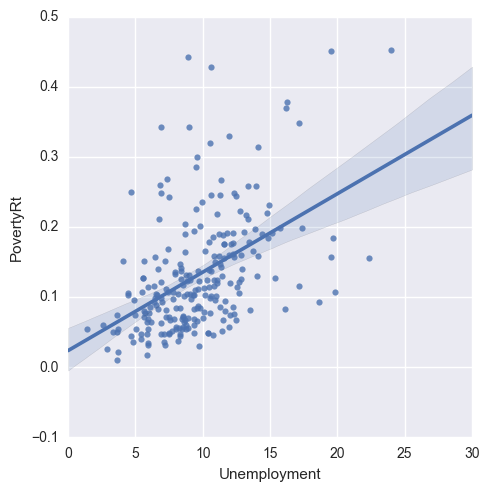

In [3]:
sns.lmplot(x='Unemployment',y='PovertyRt',data=census_df,fit_reg=True) 

### As we can see, increase in unemployment leads to an increase of Poverty. 
Let's look at some more subtle variables.


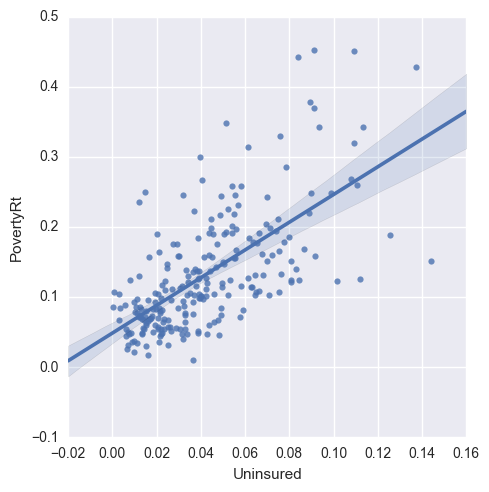

In [4]:
sns.lmplot(x='Uninsured',y='PovertyRt',data=census_df,fit_reg=True)

### Again, More the number of people uninsured, more the poverty.
Now let's look at how closely these variables are related.

In [5]:
census_df.corr()

TotalPopulation  PovertyRt  Unemployment  Uninsured
TotalPopulation         1.000000  -0.055087      0.106908  -0.106047
PovertyRt              -0.055087   1.000000      0.477583   0.657744
Unemployment            0.106908   0.477583      1.000000   0.256592
Uninsured              -0.106047   0.657744      0.256592   1.000000

### Correlation between Poverty Rate & Unemployment: 0.4 
### Correlation between Poverty Rate & Uninsurance: 0.657
### First Insight! <u>Poverty and Uninsurance are more strongly related than Poverty and Unemployment.</u> 

### Now, let's visualize the Population, Poverty and Unemployment in major areas of San Diego. It is essential to do so to quickly get a sense of the disparity of these factors within San Diego. This give insights about potentional range of the negative factors we are dealing with.

In [6]:
#More Data Cleaning!
census_df.columns.values[0] = 'CPA' 
census_df['Year'] = '2010'
census_df = census_df[['CPA', 'Year', 'TotalPopulation','PovertyRt', 'Unemployment', 'Uninsured']].groupby(['CPA'], as_index=False).mean()

#Gathering 25 Popular San Diego Neighborhoods
other_df = df_pop[['CPA', 'POPULATION']].groupby(['CPA'], as_index=False).mean()
vis_df = pd.merge(other_df, census_df, on='CPA')

### Looking at Poverty Rate of different San Diego neighborhoods

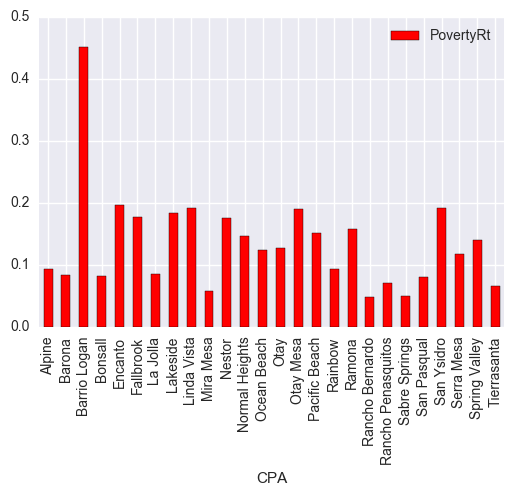

In [7]:
vis_df.plot(x='CPA', y='PovertyRt', kind='bar', color = 'red')

### Looking at Unemployment of different San Diego Neighborhoods

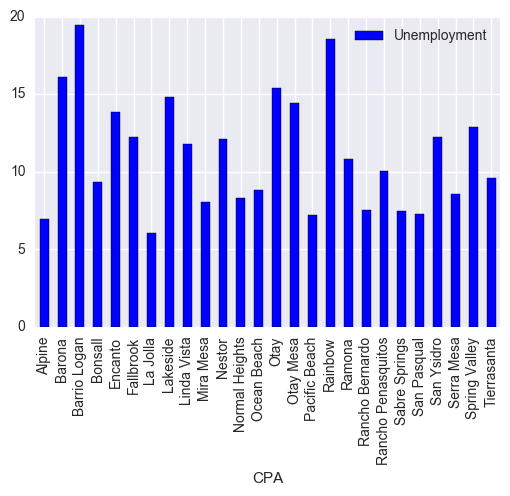

In [8]:
vis_df.plot(x='CPA', y='Unemployment', kind='bar', color = 'blue')

### Looking at Population of different San Diego Neighborhoods

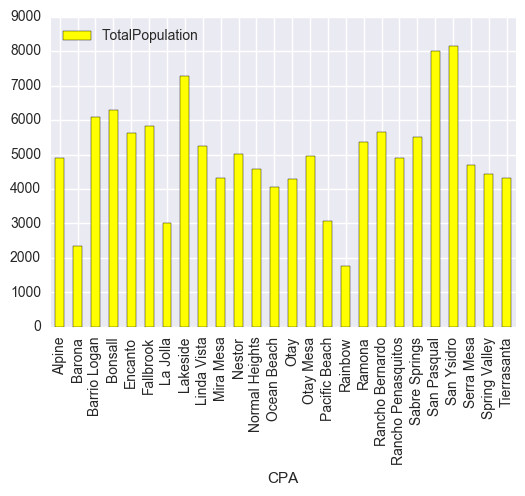

In [9]:
vis_df.plot(x='CPA', y='TotalPopulation', kind='bar', color = 'yellow')

As expected, Neighborhoods with high Unemployment also indicated high Poverty <i>For eg. Bario Logan</i>. However, it's interesting to notice that the Poverty Rate of different neighborhoods in San Diego can range from <b> 0.08 to 0.45 </b>.

### Correlation between Population, Poverty Rate and Unemployment in 2010.   

In [10]:
outcome_1, predictors_1 = patsy.dmatrices('TotalPopulation ~ PovertyRt', vis_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print (res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        TotalPopulation   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.048
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.165
Time:                        23:02:26   Log-Likelihood:                -225.68
No. Observations:                  26   AIC:                             455.4
Df Residuals:                      24   BIC:                             457.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4283.4807    574.762      7.453      0.0

In [11]:
outcome_1, predictors_1 = patsy.dmatrices('PovertyRt ~ Uninsured', vis_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print (res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              PovertyRt   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     34.39
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           4.76e-06
Time:                        23:02:27   Log-Likelihood:                 40.454
No. Observations:                  26   AIC:                            -76.91
Df Residuals:                      24   BIC:                            -74.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0420      0.019      2.199      0.0

**In 2010:**
Looking at the p-values from the OLS models, there is some amount of correlation between population and poverty rate in San Diego, but not enough to be statstically significant (p = 0.165). Wheras, as expected, there is a high correlation between poverty rate and other factors (such as uninsurance and unemployment). In terms of gentrification, the raw variety in population is not too important, since we care more so about the changes in population over time. However, these other factors -- unemployment and uninsurance -- heighten the seriousness of the poverty problem. A potentially high percentage of people living in poverty in an area may slow down the economy around the area (making living conditions worse), and the insurance problems may be harmful towards life. 

# Factors and Effects of Gentrification over Time

### Now, having looked at different areas of San Diego, and the correlation between a few of the negative possible factors of gentrification, we will now look at how these factors and effects, have changed over the years. 


## Data Wrangling

In [28]:
zillow_SDdata = pd.read_excel("san-diego-ca-neighborhoods-Report.xls", header =2)
zillow_SDdata= zillow_SDdata.drop(zillow_SDdata.index[0])
zillow_SDdata = zillow_SDdata.drop("Region Type", axis =1)
zillow_SDdata = zillow_SDdata.drop("Type", axis =1)
zillow_SDdata = zillow_SDdata[zillow_SDdata.keys()[:7]]
zillow_SDdata = zillow_SDdata.drop(["Month Over Month","Quarter Over Quarter", "Year Over Year", "10 Year Annualized"], axis = 1)
zillow_SDdata = zillow_SDdata.replace("---", np.nan)
zillow_SDdata = zillow_SDdata.dropna()

columns = ["neighborhood", "Change", "2017", "2016", "2015", "2014", "2013"]
propertyValue_SD = pd.DataFrame(columns = columns)

for index, row in zillow_SDdata.iterrows():
    neighborhood = row["Region Name"]
    change = row['5 Year Annualized'] *100
    x_2017 = row["Current"]
    x_2016 = x_2017 * (1 - row["5 Year Annualized"]) 
    x_2015 = x_2016 * (1 - row["5 Year Annualized"]) 
    x_2014 = x_2015 * (1 - row["5 Year Annualized"]) 
    x_2013 = x_2014 * (1 - row["5 Year Annualized"])
    add_propertyValue_SD = pd.DataFrame([[neighborhood, change, x_2017, x_2016, x_2015, x_2014, x_2013]], columns = columns) 
    propertyValue_SD = propertyValue_SD.append(add_propertyValue_SD)

# Property Value of Neighborhoods in San Diego for 2017

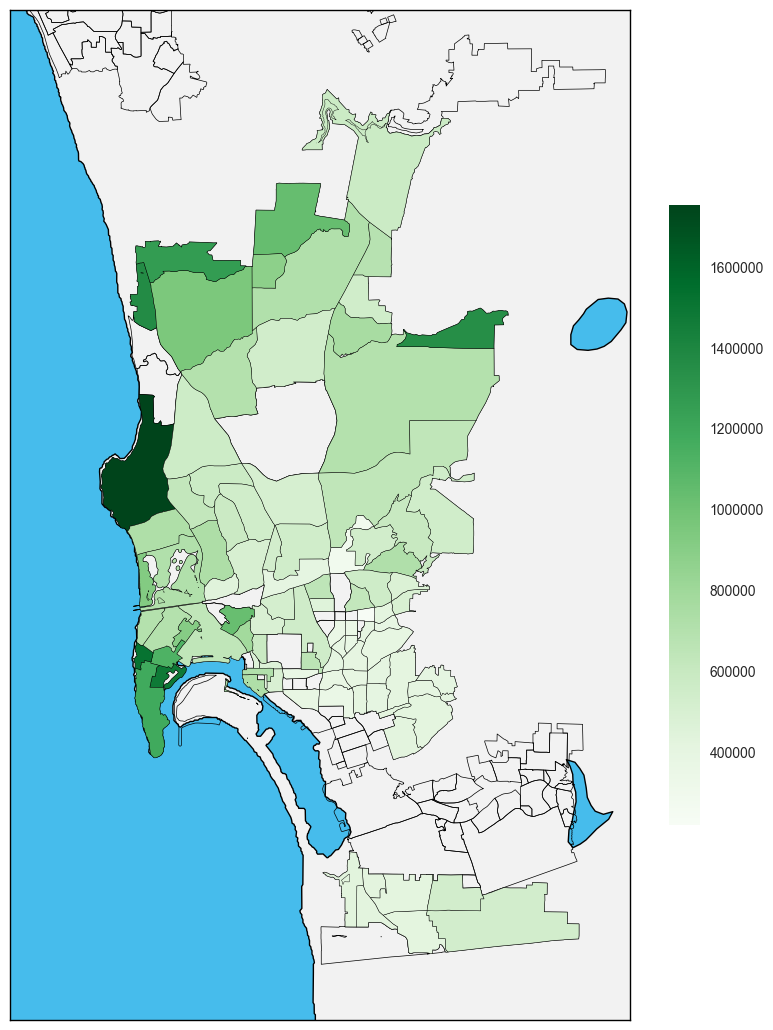

In [14]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2017'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2017'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2016

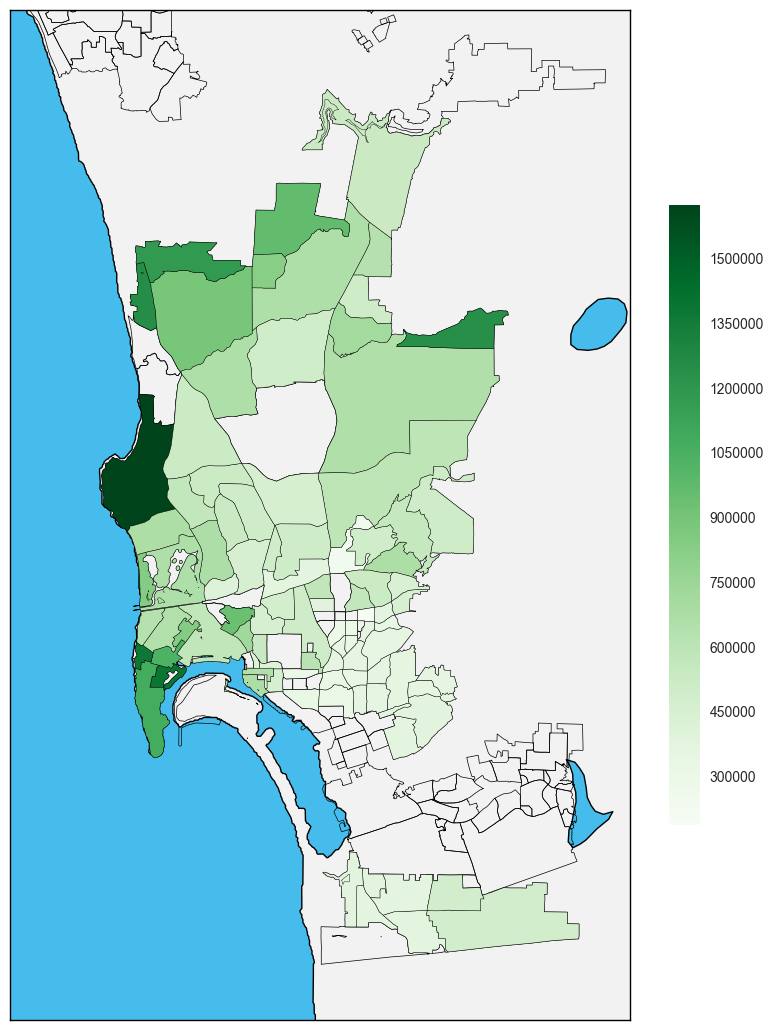

In [16]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2015

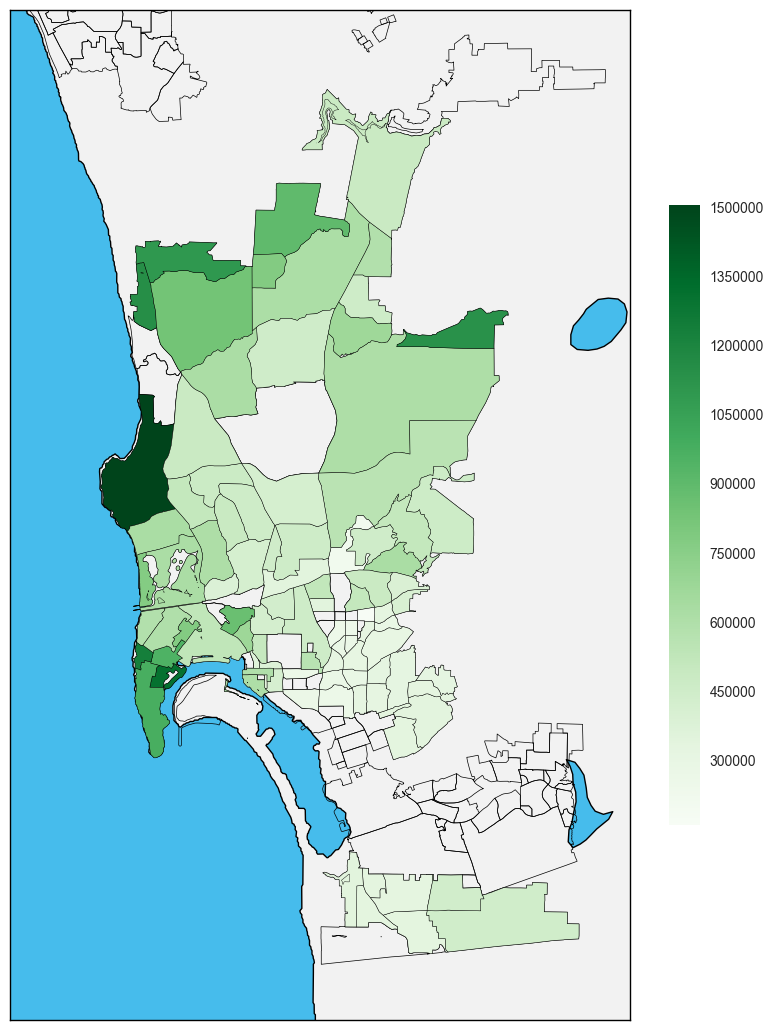

In [17]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2014

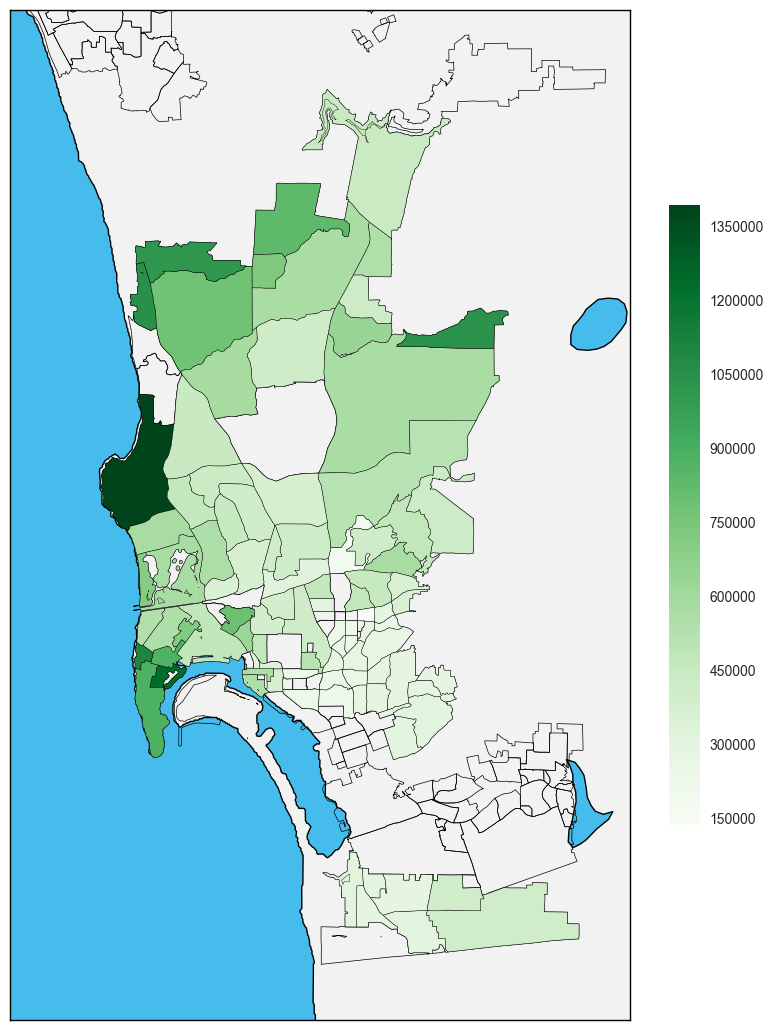

In [18]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Property Value of Neighborhoods in San Diego for 2013

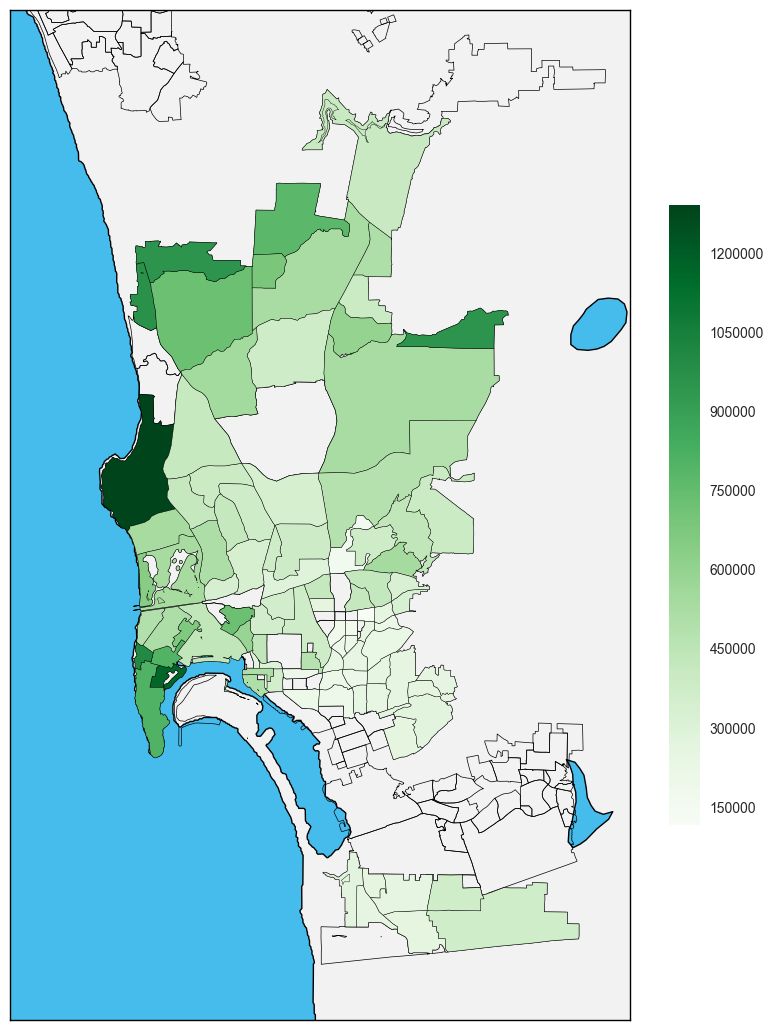

In [19]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

## Insight
The above maps indicate that there has been a constant increase in property values in all neighborhoods of San Diego.

# Income Distribution Data

We will now be looking at how income levels have changed over time in certain neighborhoods of San Diego. 
The income in San Diego is spread out very unevenly between different neighborhoods, as shown below. So analyzing the changes in income levels at a neighborhood level may reveal signs of gentrification affecting certain areas in the city. To begin with, here is the income distribution in San Diego in 2016 in 3 different San Diego neighborhoods.

## Income Distribution: La Jolla 2016

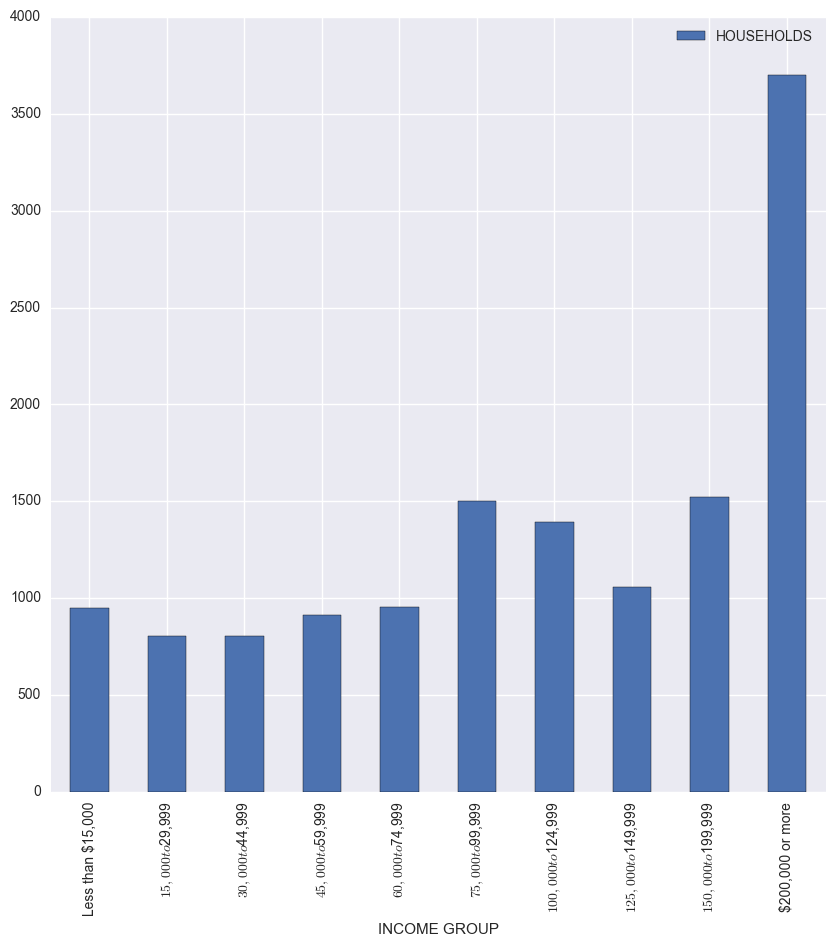

In [20]:
df_laj16 = df_income.loc[(df_income['CPA'] == "La Jolla") & (df_income['YEAR'] == 2016)]
df_laj16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

Usually, income tends to be skewed right, where there are a few exceptionally rich people. However, in La Jolla, there are a lot more wealthy households than the average.

## Income Distribution: Downtown 2016

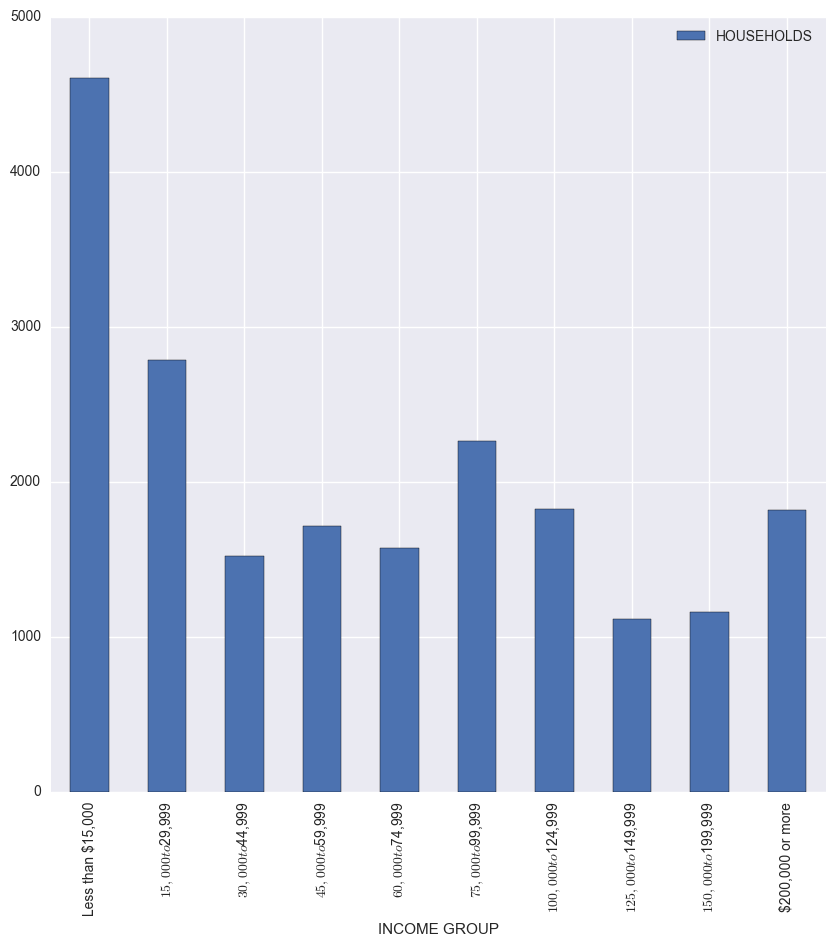

In [21]:
df_dwtn16 = df_income.loc[(df_income['CPA'] == "Downtown") & (df_income['YEAR'] == 2016)]
df_dwtn16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

On the other hand, Downtown's income distribution has many more households at the lower end than the average.

## Income Distribution: Kerny Mesa 2016

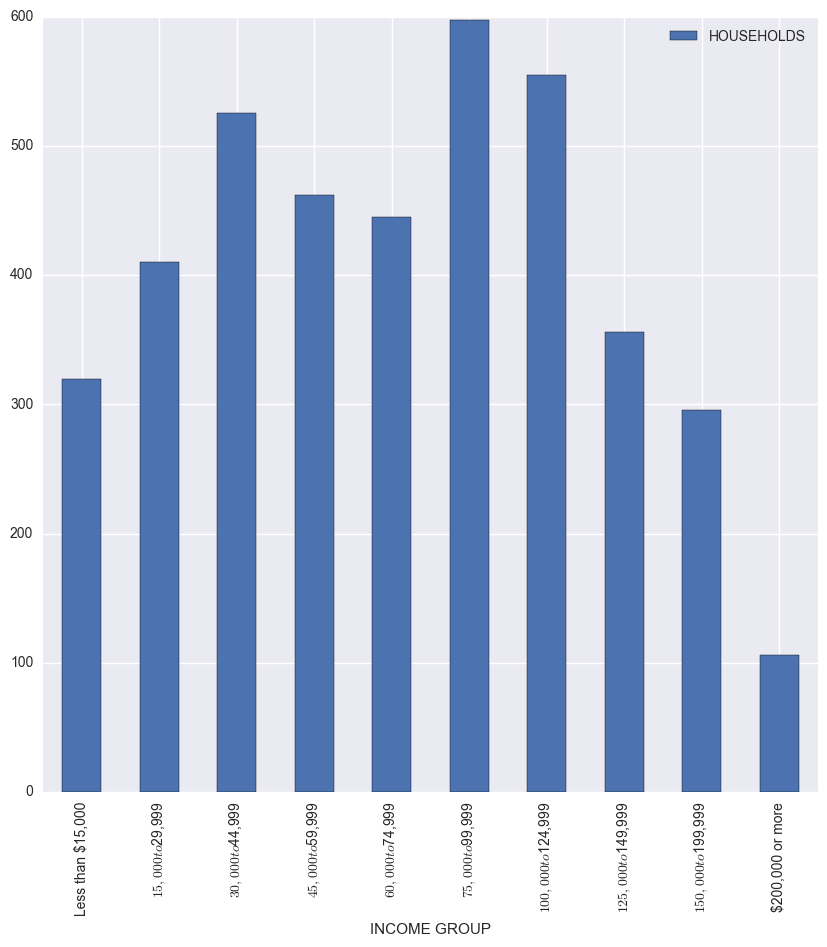

In [22]:
df_krny16 = df_income.loc[(df_income['CPA'] == "Kearny Mesa") & (df_income['YEAR'] == 2016)]
df_krny16.plot(x="INCOME GROUP", y="HOUSEHOLDS", kind="bar", figsize=(10,10), stacked= True)

Kerney Mesa has a more "average" income distribution. These 3 areas highlight the income disparities between different neighborhoods in San Diego. These bar graphs indicate the high variance in the variance of income of different regions of San Diego. It is expected to see neighborhoods with a more normal income distribution and a more left-skewed distribution to undergo gentrification, effecting regions surrounding it.

## Income over Time

The plots above show some distributions in 2016, but to show the effect of gentrification, we care about the changes in this distribution over time. The following plots show the changes in the total number of households in each income bracket for all of San Diego (aggregate of all neighborhoods).  

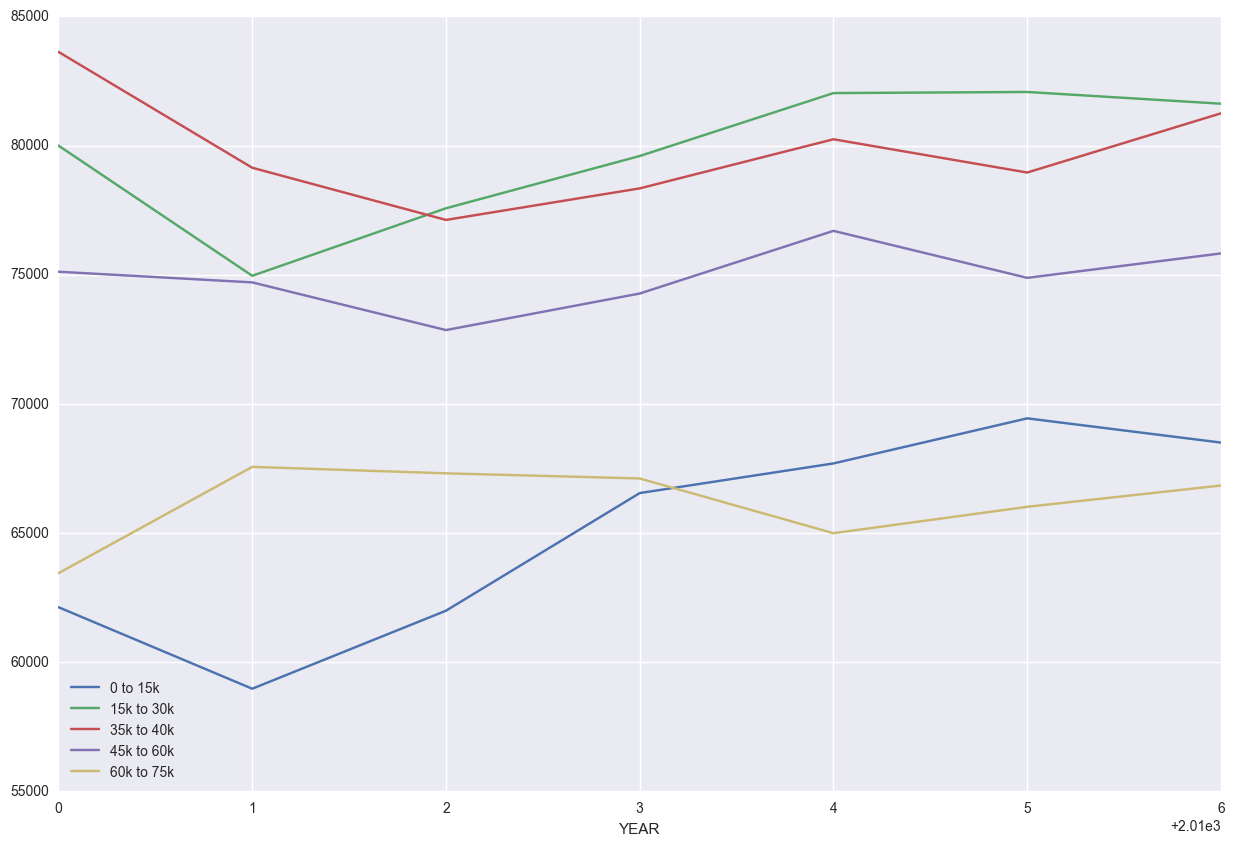

In [23]:
ib = df_income.groupby(["ORDINAL", "YEAR"])["HOUSEHOLDS"].sum()
ib[1].plot(figsize=(15,10), label = "0 to 15k", legend="True" )
ib[2].plot(figsize=(15,10), label = "15k to 30k", legend="True")
ib[3].plot(figsize=(15,10),  label = "35k to 40k", legend="True")
ib[4].plot(figsize=(15,10), label = "45k to 60k", legend="True")
ib[5].plot(figsize=(15,10), label = "60k to 75k", legend="True" )

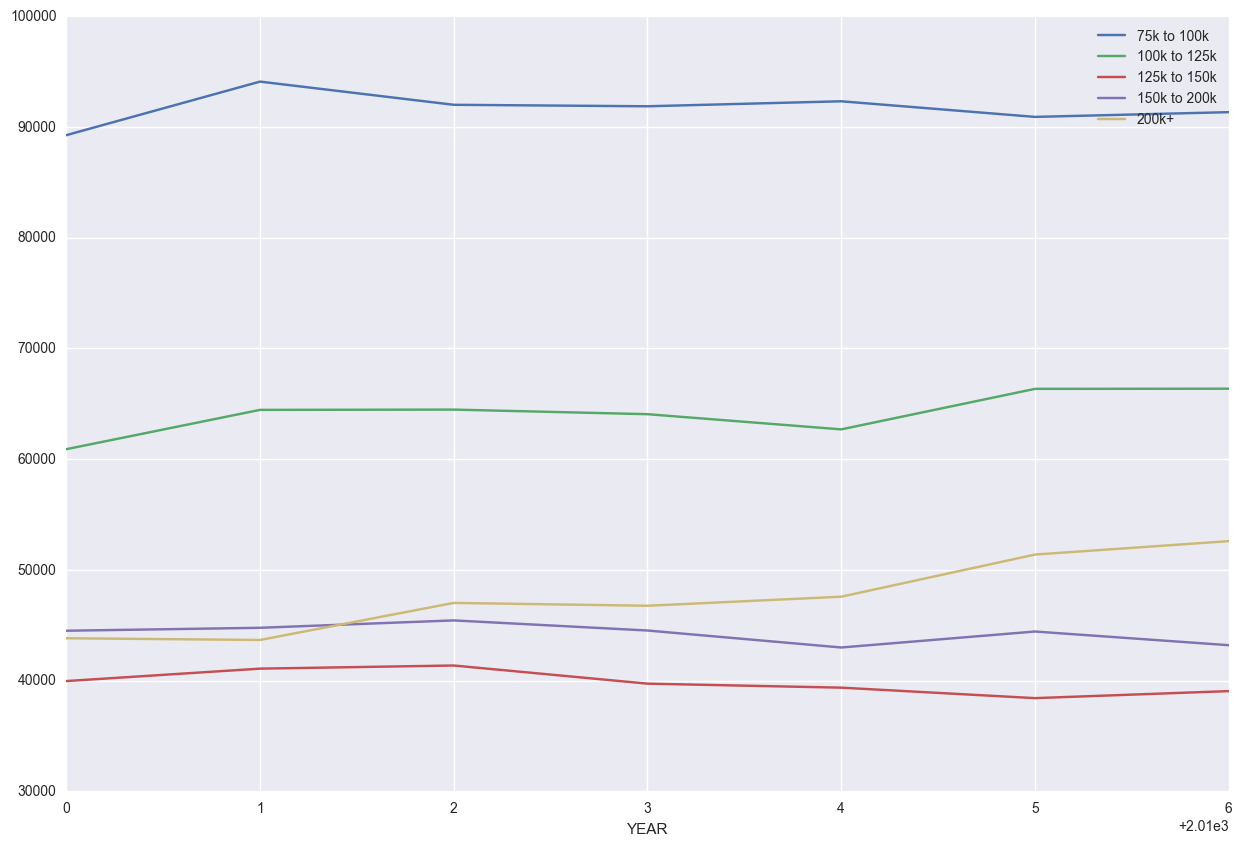

In [24]:
ib[6].plot(figsize=(15,10), label = "75k to 100k", legend="True")
ib[7].plot(figsize=(15,10),  label = "100k to 125k", legend="True")
ib[8].plot(figsize=(15,10), label = "125k to 150k", legend="True")
ib[9].plot(figsize=(15,10), label = "150k to 200k", legend="True" )
ib[10].plot(figsize=(15,10), label = "200k+", legend="True")

From these plots, we can see that between 2011 and 2015, the number of households in poorer income brackets ( \$0k - $ $60k per year), significantly increased, while the middle class and upper middle class brackets see a slight decrease 

# Map visualization of San Diego's Income Distribution
Chnges in income distribution can indicate to areas experiencing gentrification. As more middle class people into gentrified areas, income distributions may increase overall and areas where less-off people will move to, the mean income will drop.

In the following map we represent the percentage of households with income under \$30k, which is our standard of poverty, given that the official poverty line is \$24k.

In [3]:
cols = ['CPA', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'change']
df_30k = pd.DataFrame(columns=cols)

hoods = df_income.CPA.unique()

# building income levels for < 30k
for h in hoods:
    df_h = df_income.loc[df_income["CPA"] == h]
    df_15k = df_h.loc[(df_h["ORDINAL"] == 1) | (df_h["ORDINAL"] == 2)]
    
    yrs=[-1]*7
    for y in range(7):
        df_y = df_h.loc[df_h["YEAR"] == (2010+y)]
        df15_y = df_15k.loc[df_15k["YEAR"] == (2010+y)]
        poor_y = df15_y["HOUSEHOLDS"].sum()
        tot_y = df_y["HOUSEHOLDS"].sum()
        if (tot_y > 0):
            yrs[y] = (float(poor_y) / tot_y) * 100
    #Gets the overall nett change. Positive means more people are in poverty currently than before 
    change = yrs[0] - yrs[6]
    row = [h] + yrs + [change]
    df_r = pd.DataFrame([row], columns=cols)
    df_30k = df_30k.append(df_r, ignore_index=True)

#NOTE: if the number of households in that region in that year was 0, then the percentage is displayed as -1. 
#It's probably best to just throw out these rows

df_30k= df_30k.replace("-1", np.nan)
df_30k = df_30k.dropna()
df_30k.columns = ['neighborhood', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'change']
df_30k["neighborhood"]= df_30k.neighborhood.str.upper()

# Percentage of Households in Poverty per Neighborhood for 2016

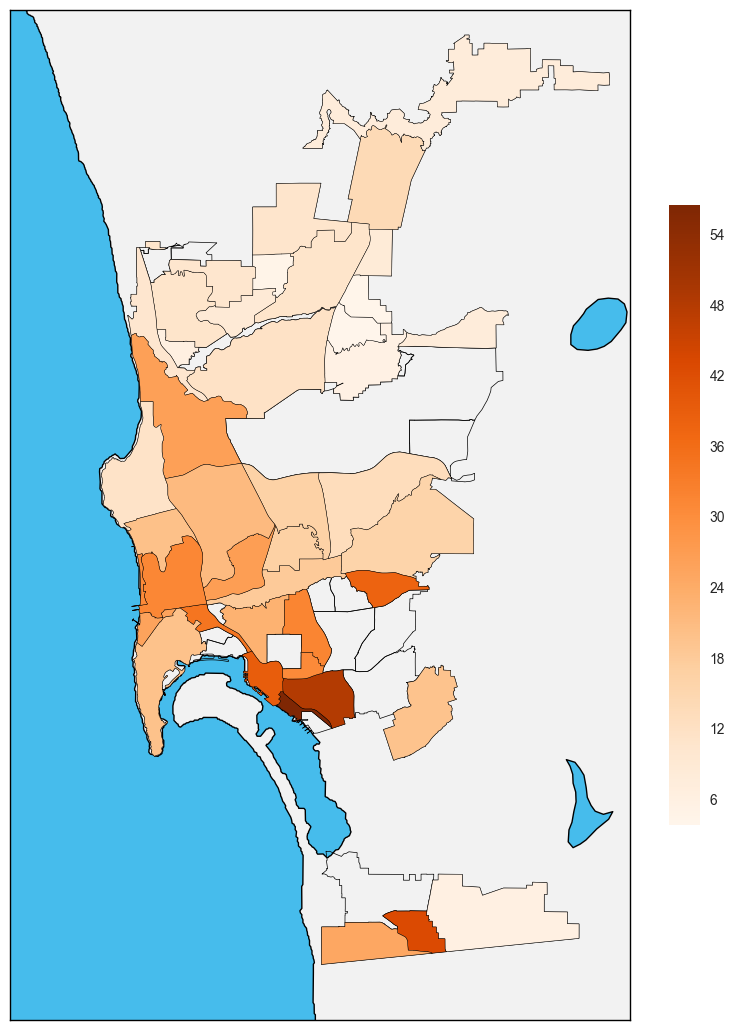

In [4]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2015

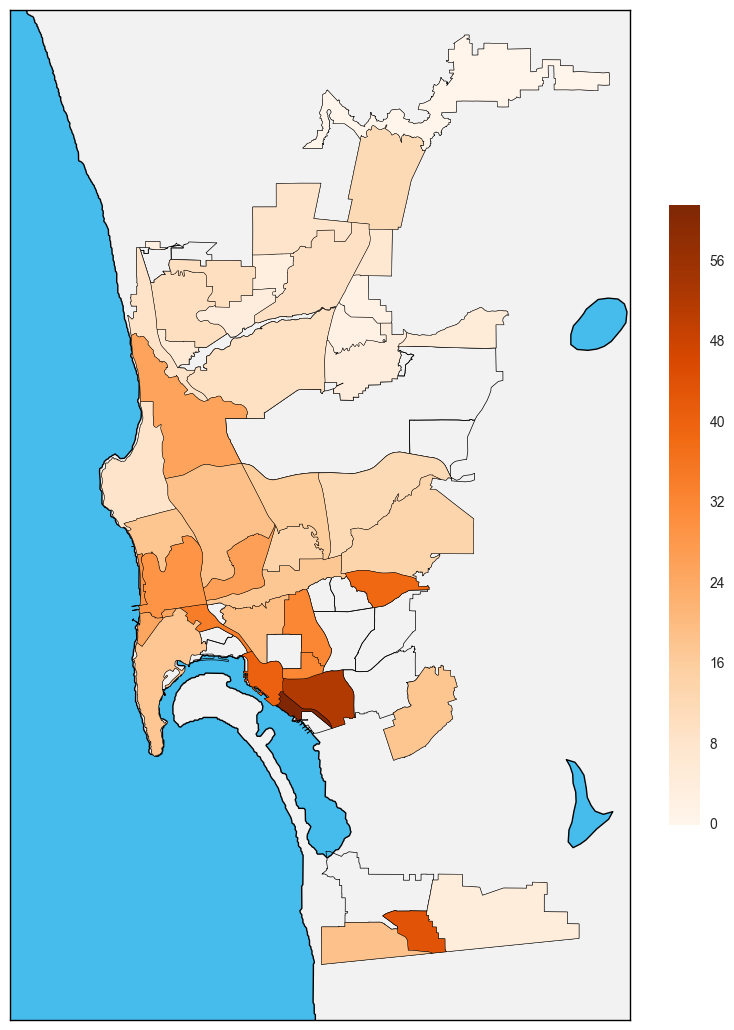

In [5]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2014

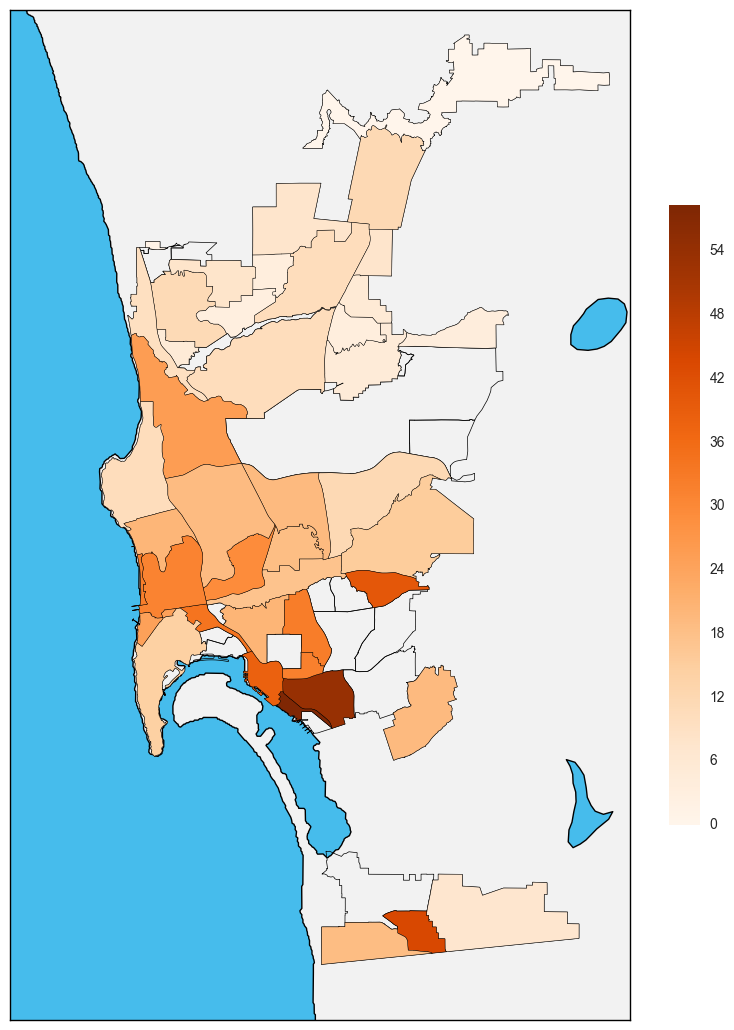

In [6]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2013

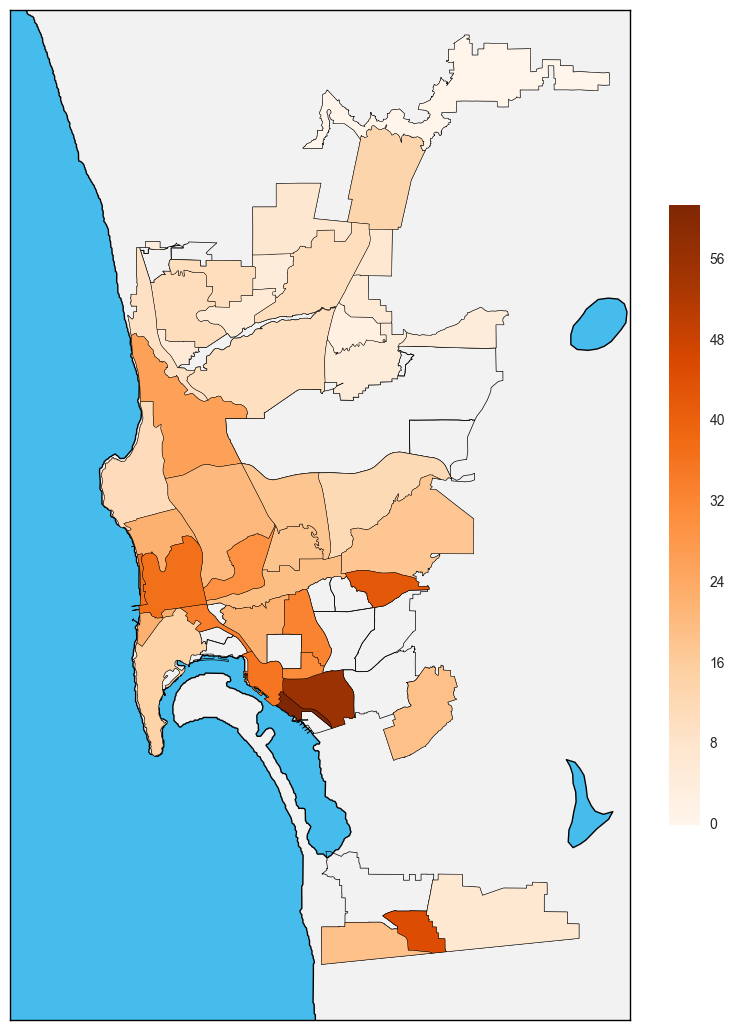

In [7]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2012

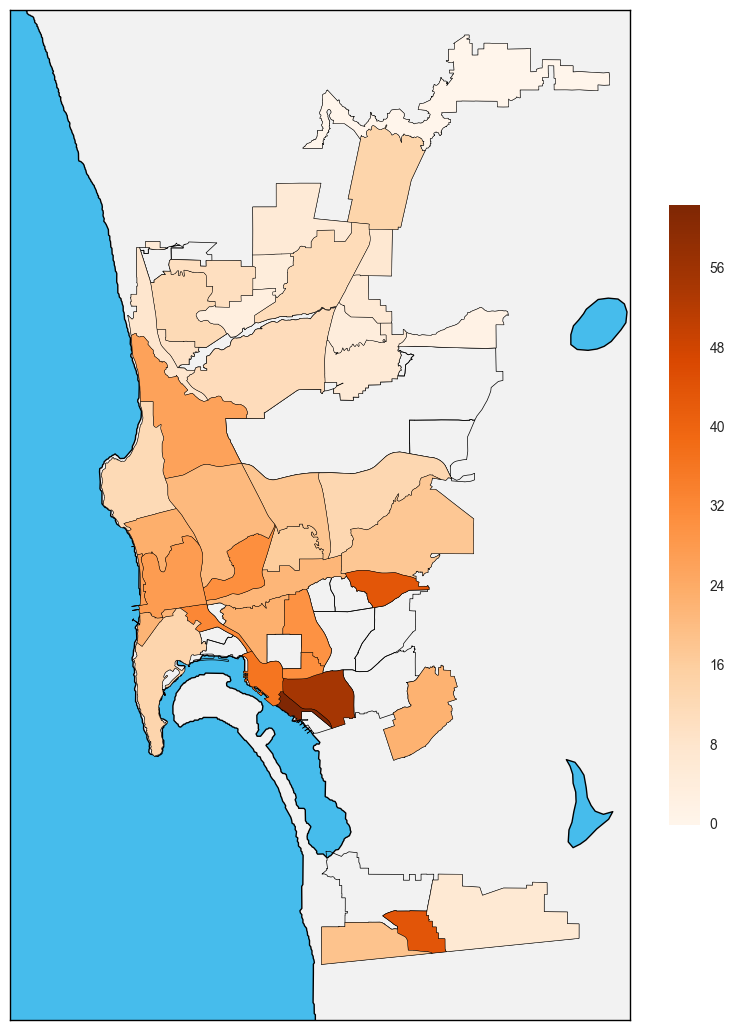

In [8]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2011

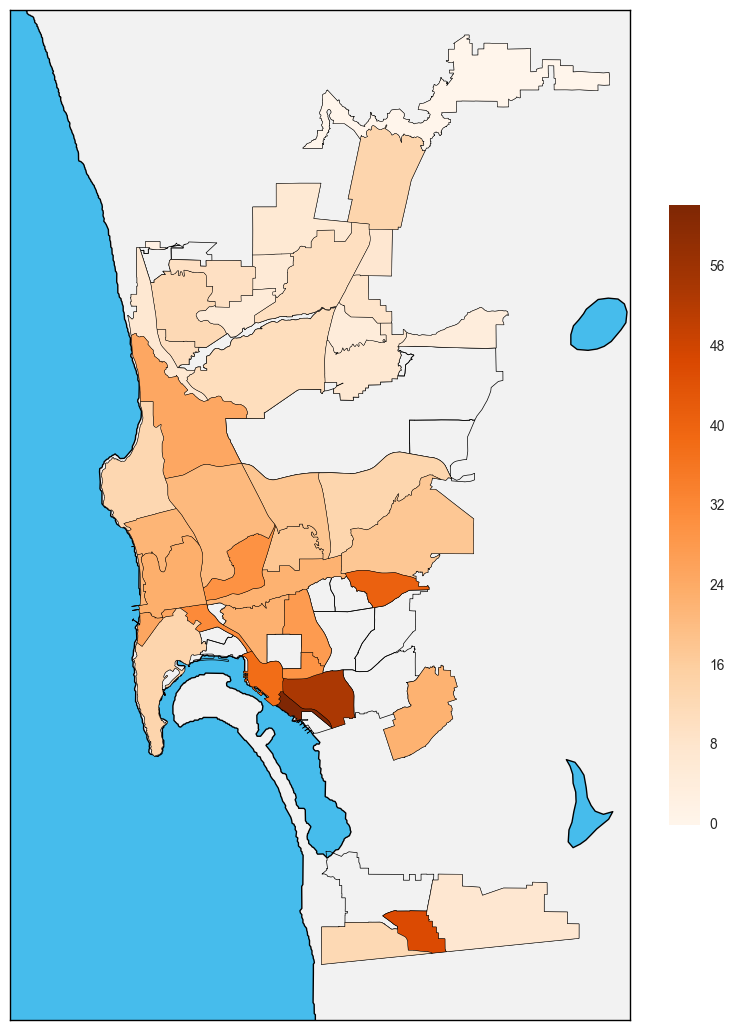

In [38]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

# Percentage of Households in Poverty per Neighborhood for 2010

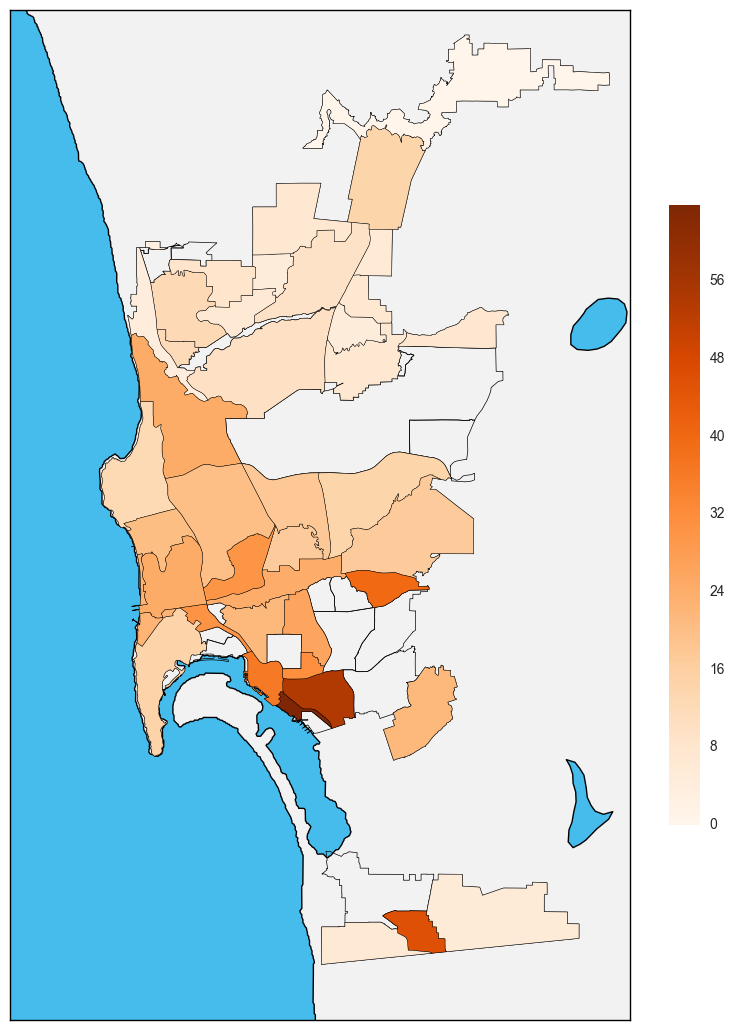

In [39]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m

# Population Data

In [10]:
df_pop_struct = df_pop.groupby(['CPA', 'YEAR']).sum()
df_pop_struct = df_pop_struct.reset_index()

df2 = {}
df2['2010'] = df_pop_struct[df_pop_struct['YEAR']==2010].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2011'] = df_pop_struct[df_pop_struct['YEAR']==2011].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2012'] = df_pop_struct[df_pop_struct['YEAR']==2012].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2013'] = df_pop_struct[df_pop_struct['YEAR']==2013].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2014'] = df_pop_struct[df_pop_struct['YEAR']==2014].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2015'] = df_pop_struct[df_pop_struct['YEAR']==2015].set_index('CPA').drop('YEAR',axis=1)['POPULATION']
df2['2016'] = df_pop_struct[df_pop_struct['YEAR']==2016].set_index('CPA').drop('YEAR',axis=1)['POPULATION']

df2 = pd.concat(df2,axis=1)
df2 = df2.reset_index()
df2.columns = ['neighborhood', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

### Population of each neighborhood in San Diego over this period
This is an overview of the population of San Diego as a whole, illustrating the changes between different neighborhoods. The slopes of each neighborhood represent the changes in populations over time.

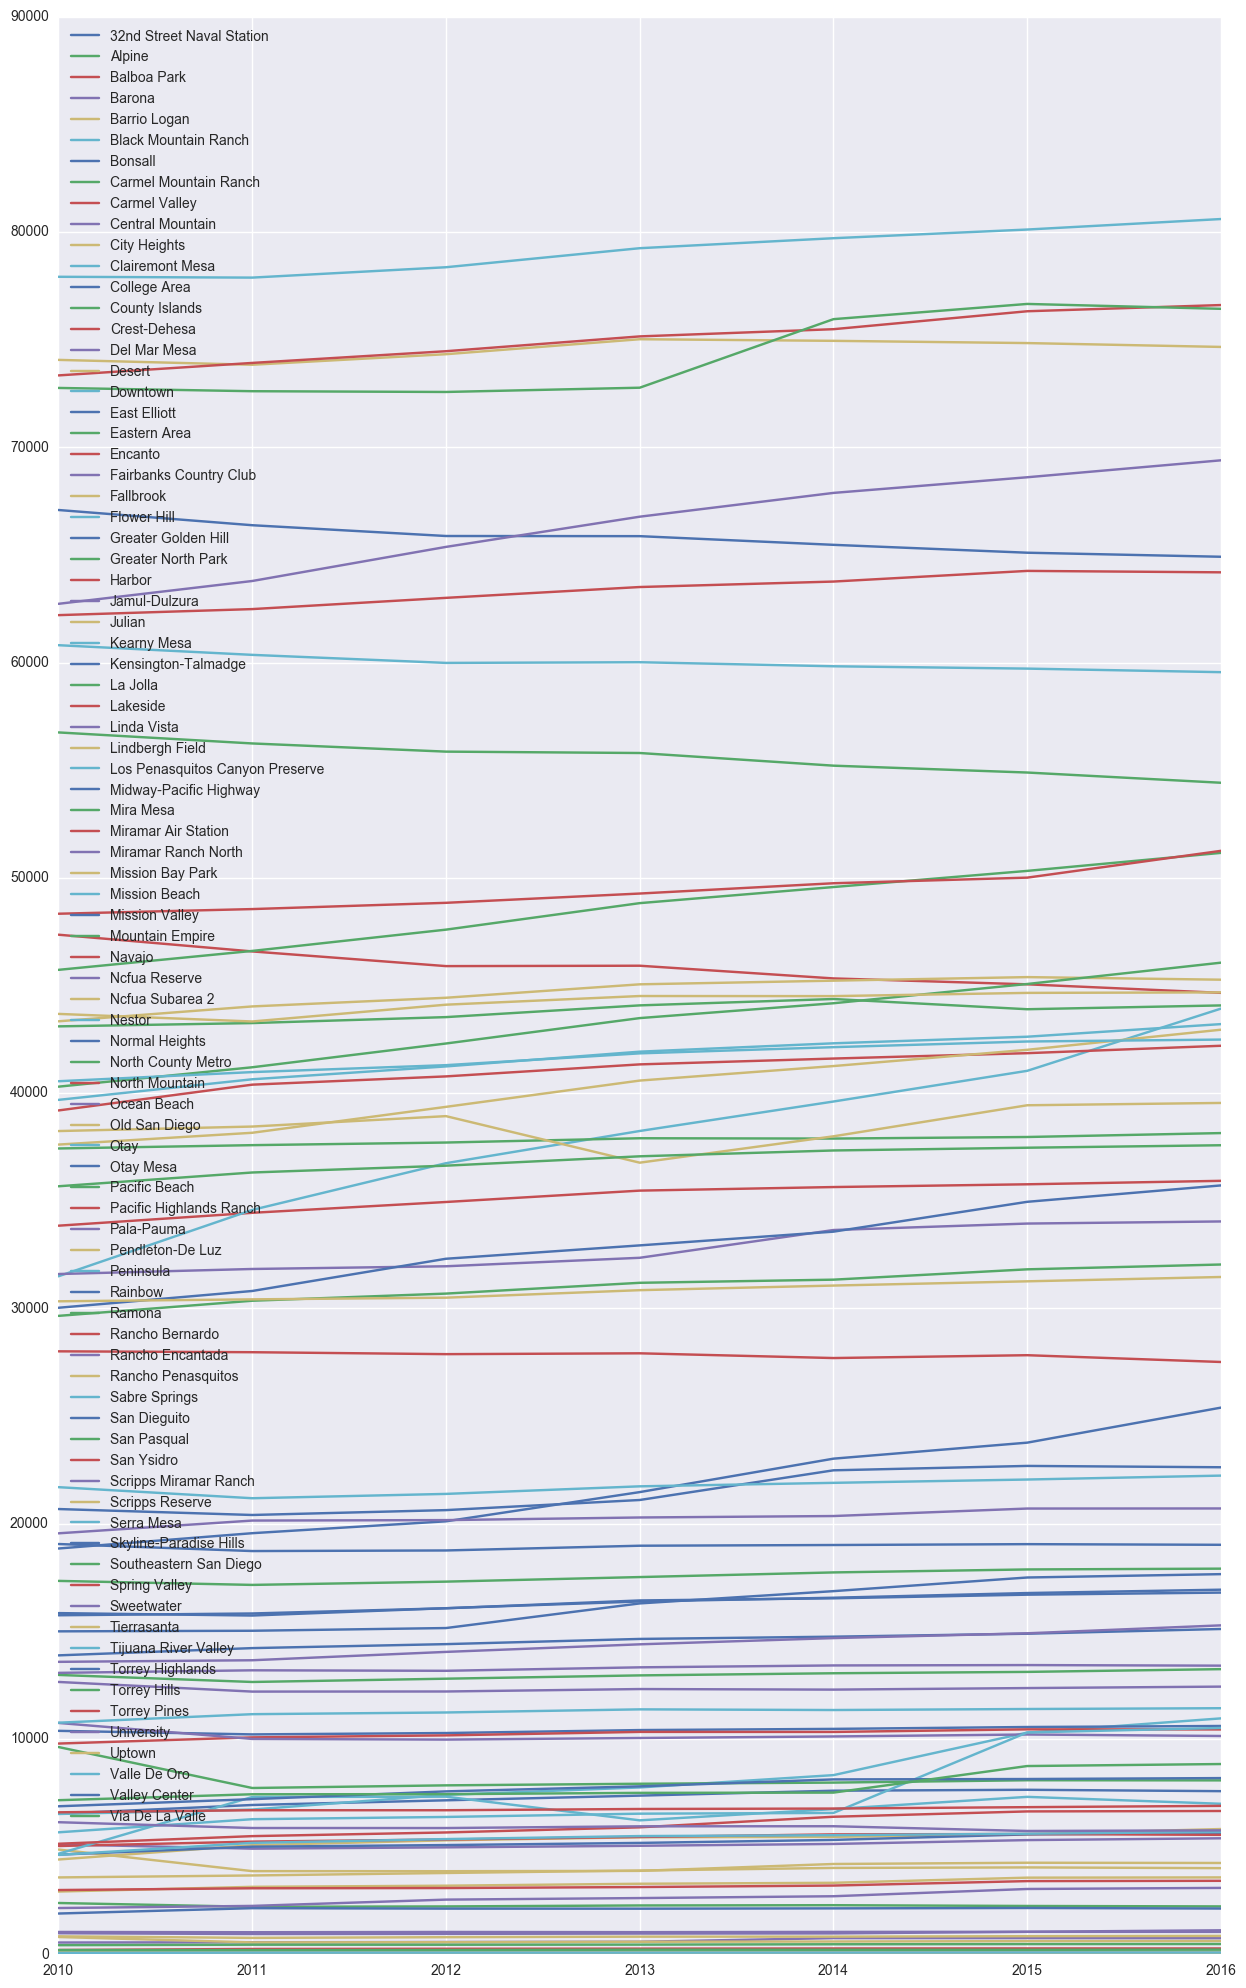

In [11]:
for i, r in df2.iterrows():
    r[1:].plot(figsize=(15,25), label= r[0], legend=True)
    

### Biggest Changes in Population

These are the neighborhoods with the largest net population changes over the last 6 years. Each point on the graph represents the percent change in the population from the previous year. Each slope represents how drastically the population is changing from year to year

In [12]:
#delta from 2010 to 2016
cols = ["neighborhood", "2011", "2012", "2013", "2014", "2015", "2016", "net", "abs(net)"]
df_pop_change = pd.DataFrame(columns = cols)
df2 = df2.replace(0, np.nan)
df2 = df2.dropna()
deltas = [0] * 6
for i, r in df2.iterrows():
    for y in range(6):
        deltas[y] = (float(r[y+2] - r[y+1]) / r[y+1] * 100)
    net = np.sum(deltas)
    net_abs = abs(net)
    row = [r[0]] + deltas + [net, net_abs]
    df_r = pd.DataFrame([row], columns = cols)
    df_pop_change = df_pop_change.append(df_r, ignore_index=True)
    df_sort = df_pop_change.sort_values("abs(net)", ascending=False)

Neighborhoods with largest Population Change
         Kearny Mesa:     74.297
Black Mountain Ranch:     55.496
                Otay:     54.094
    Rancho Encantada:     37.844
              Barona:     34.740
            Downtown:     34.358
         Balboa Park:     32.468


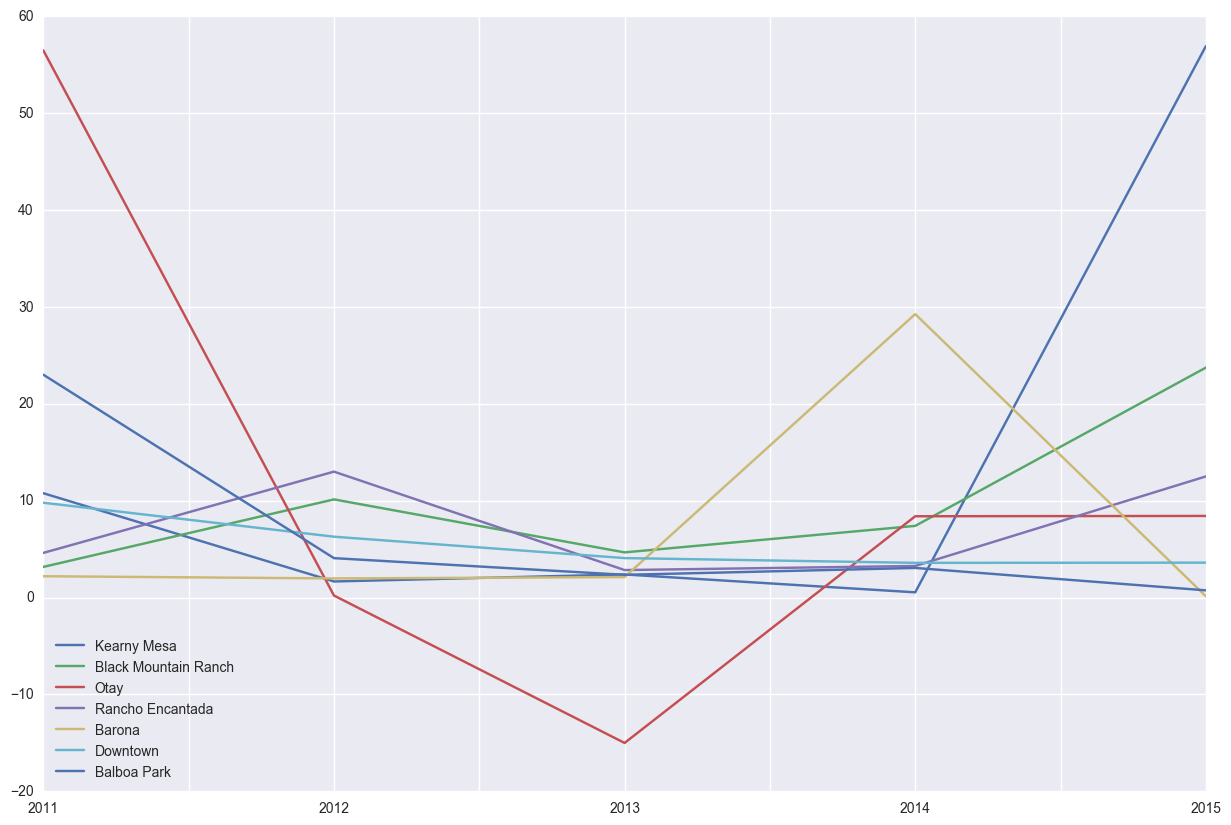

In [13]:
print("Neighborhoods with largest Population Change")
for i, r in df_sort.head(7).iterrows():
        r[1:6].plot(figsize= (15,10), label= r[0], legend=True)
        print("%20s: %10.3f" % (r[0], r[7]))

These are the neighborhoods that have had the largest net loss in population over the years. 

Neighborhoods with Population Loss
         Mission Bay Park:    -20.390
          Mountain Empire:    -15.258
             Barrio Logan:    -10.921
           County Islands:     -6.531
               Pala-Pauma:     -6.196
                  Encanto:     -5.834
            Jamul-Dulzura:     -5.542
   Southeastern San Diego:     -4.189
   Skyline-Paradise Hills:     -3.279
                   Nestor:     -2.076


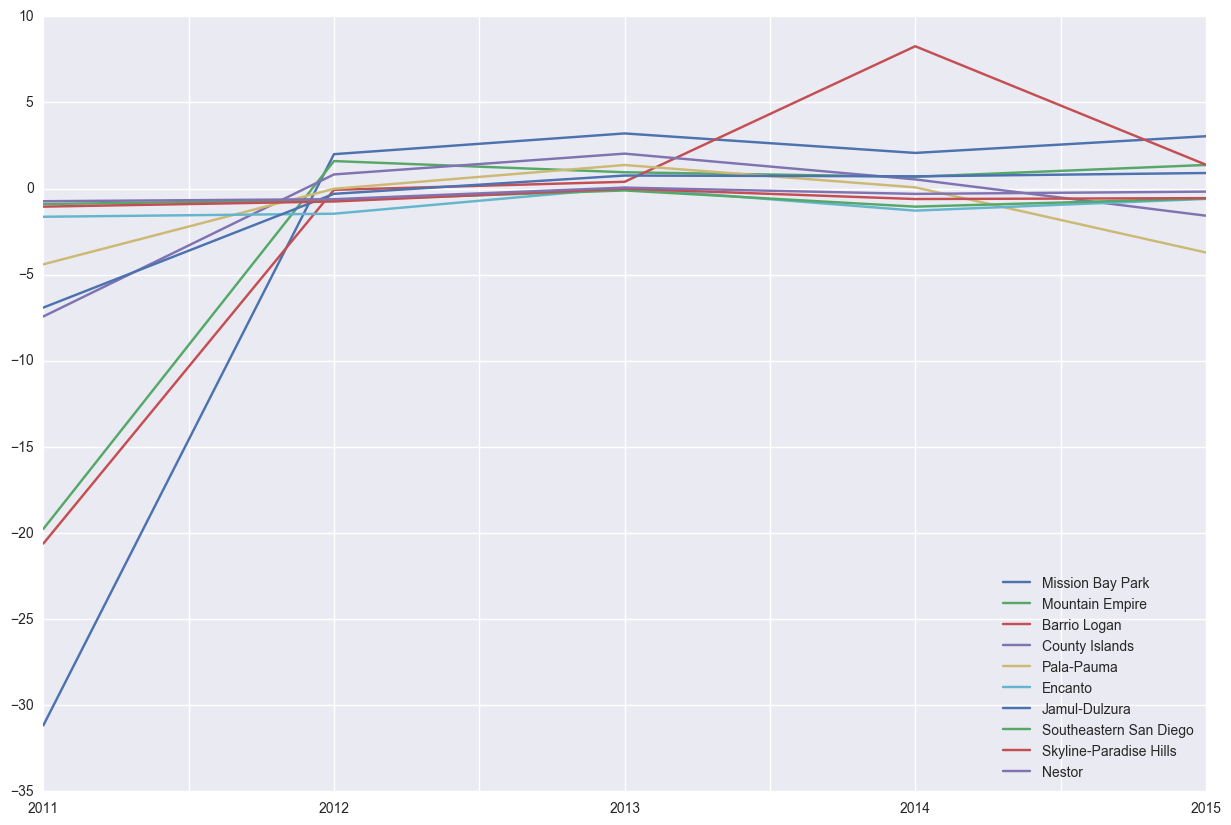

In [14]:
print("Neighborhoods with Population Loss")
neg_sort = df_pop_change.sort_values("net", ascending=True)
for i, r in neg_sort.head(10).iterrows():
        r[1:6].plot(figsize= (15,10), label= r[0], legend=True)
        print("%25s: %10.3f" % (r[0], r[7]))

# This is a representation of the Population distribution of San Diego over a period of 5 years

We believe that, as a result of gentrification, the populations within the neighborhoods would change resulting in the neighborhoods with high property value having the largest changes in population. The following maps the populations of each region in San Diego over the years.

In [15]:
df2["neighborhood"]= df2.neighborhood.str.upper()
df_sort["neighborhood"]= df_sort.neighborhood.str.upper()

In [16]:
df2= df2.replace("0", np.nan)
df_sort= df_sort.replace("0", np.nan)

In [17]:
df2= df2.dropna()
df_sort= df_sort.dropna()

# Total population distribution of San Diego for 2016

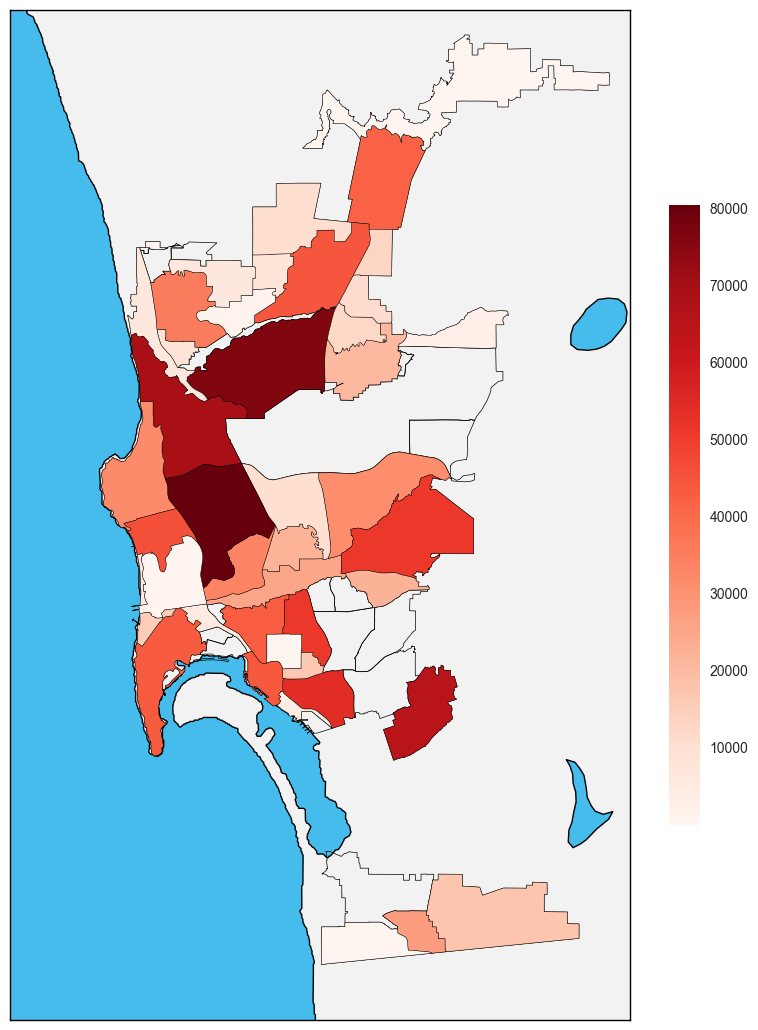

In [24]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2015

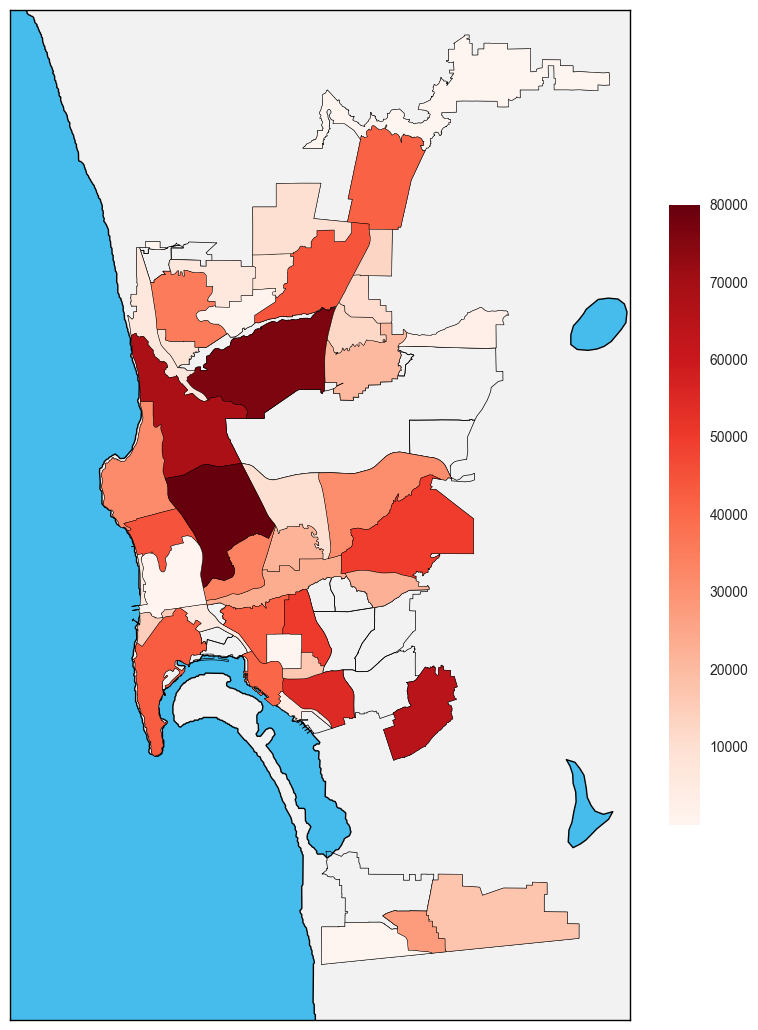

In [32]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2014

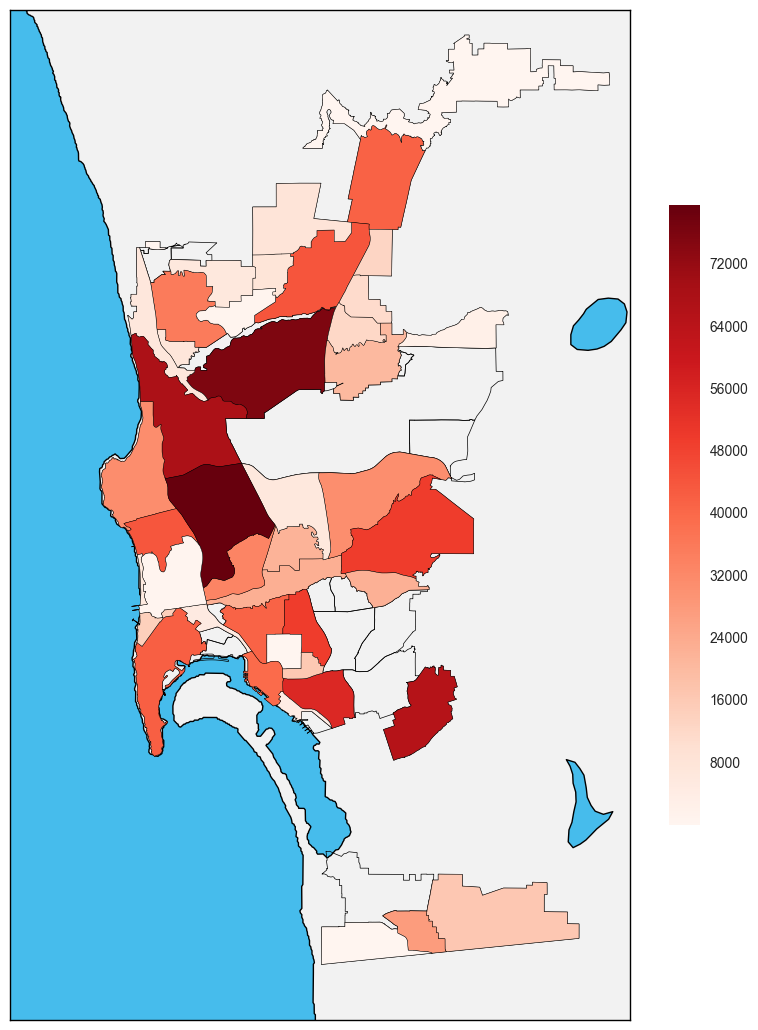

In [33]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2013

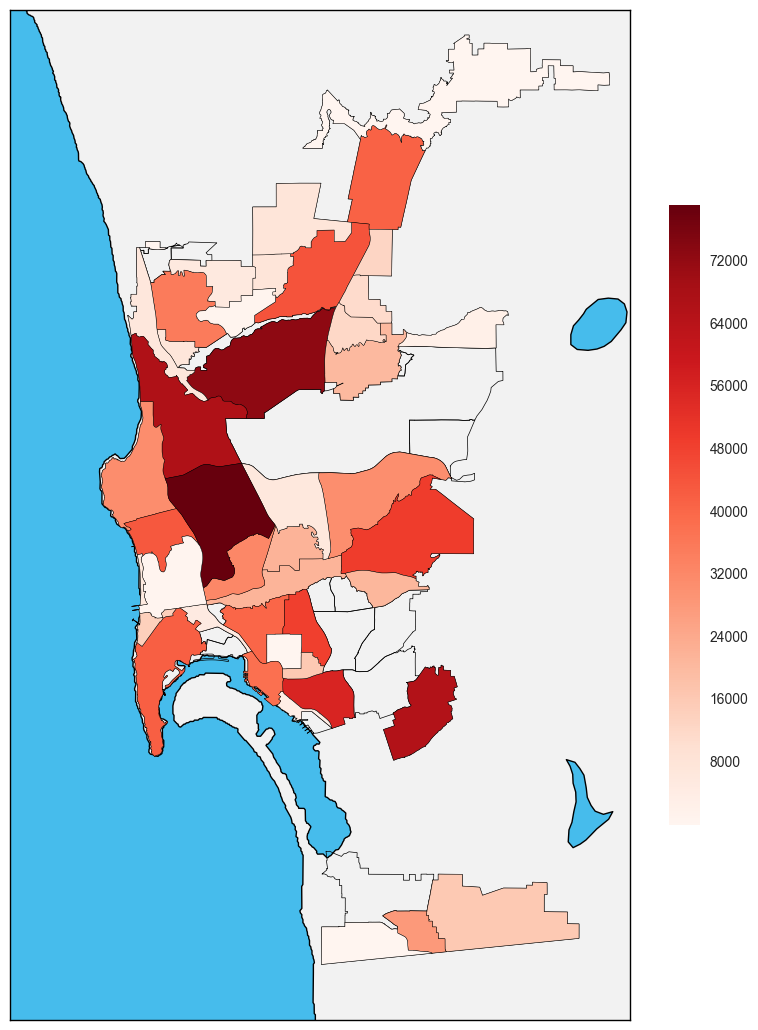

In [34]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2012

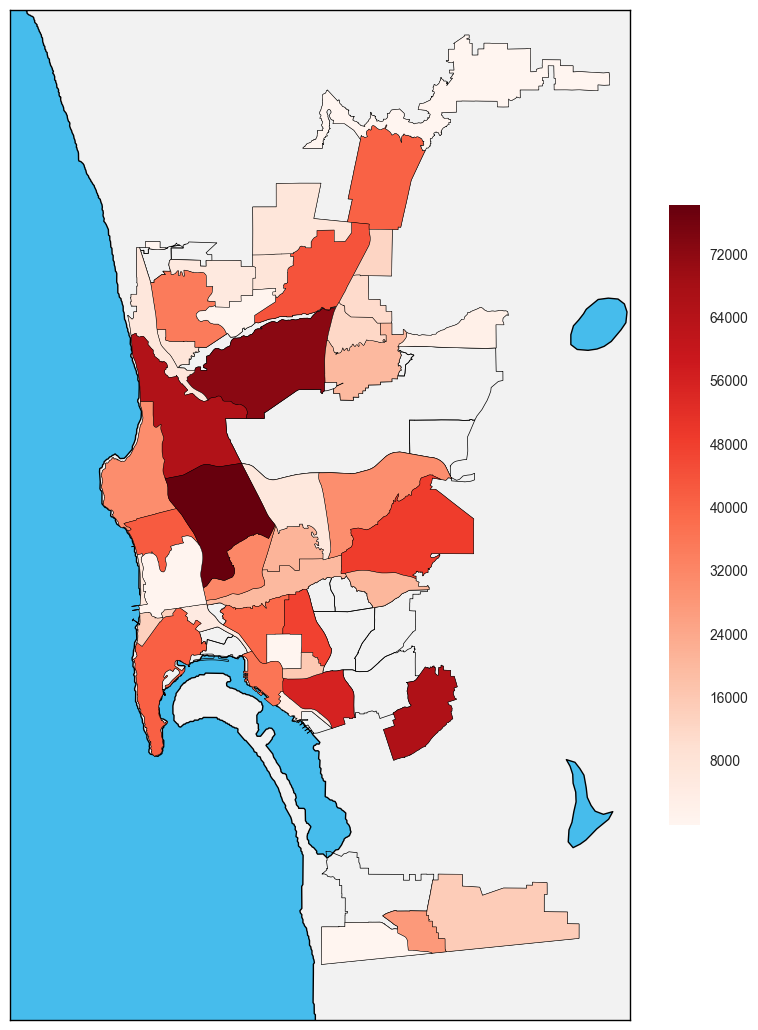

In [35]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2011

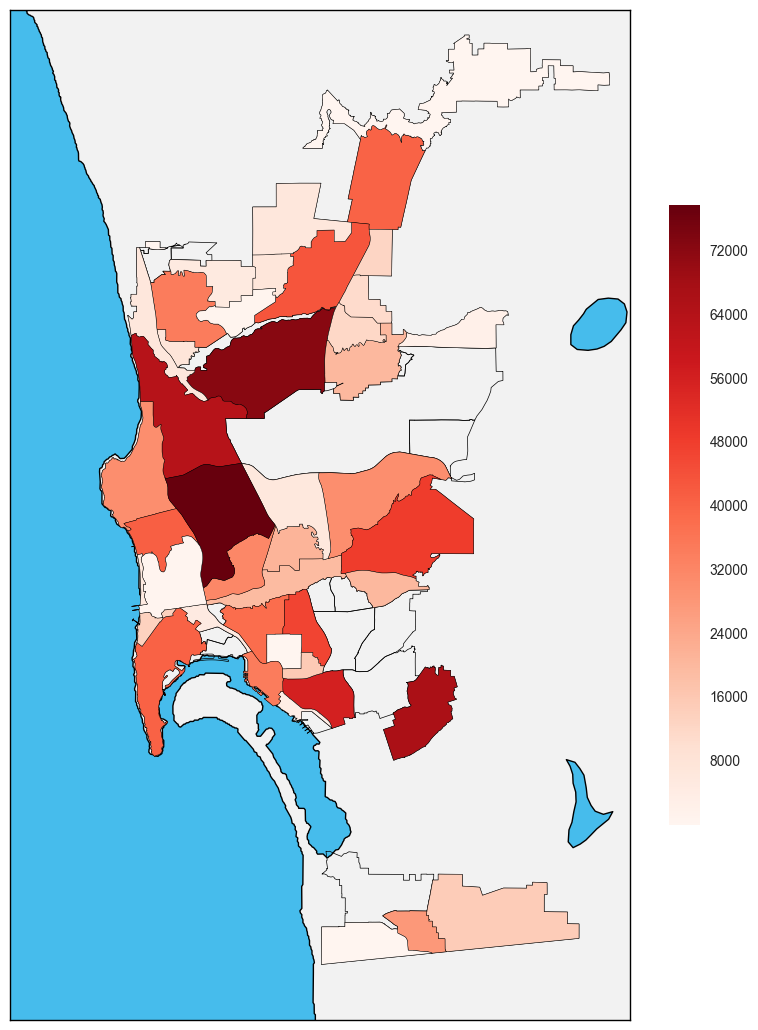

In [36]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2011'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2011'])
plt.colorbar(mapper, shrink=0.4)

m

# Total population distribution of San Diego for 2010

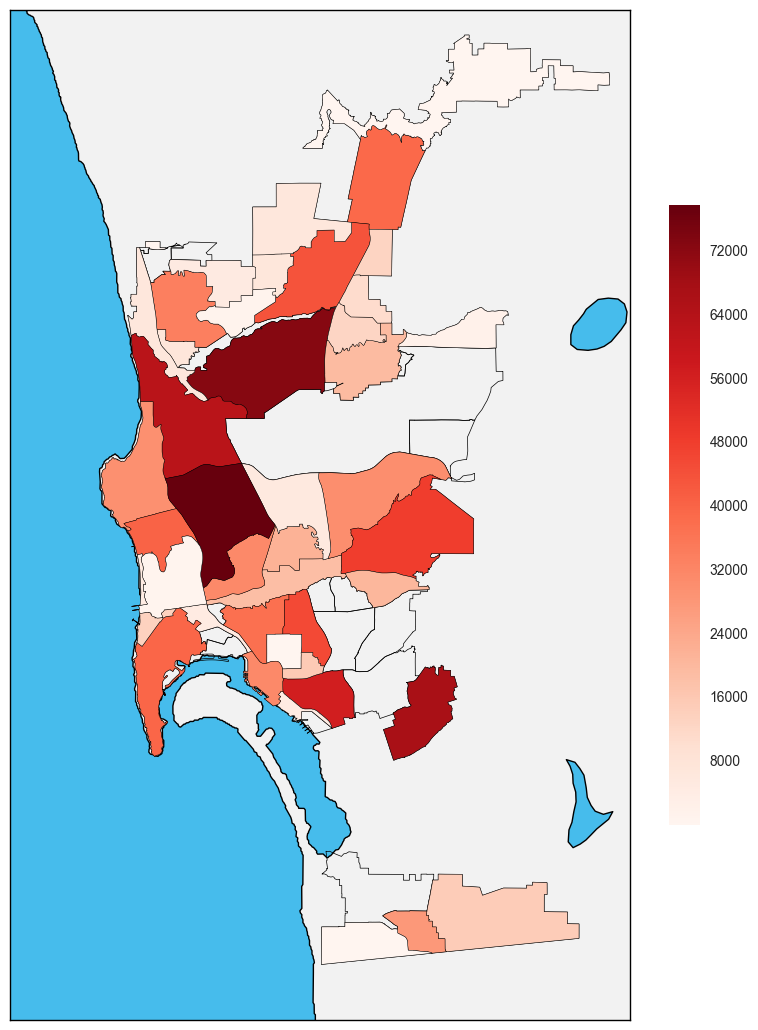

In [37]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df2, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2010'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2010'])
plt.colorbar(mapper, shrink=0.4)

m

# Change in Property Value of Neighborhoods in San Diego

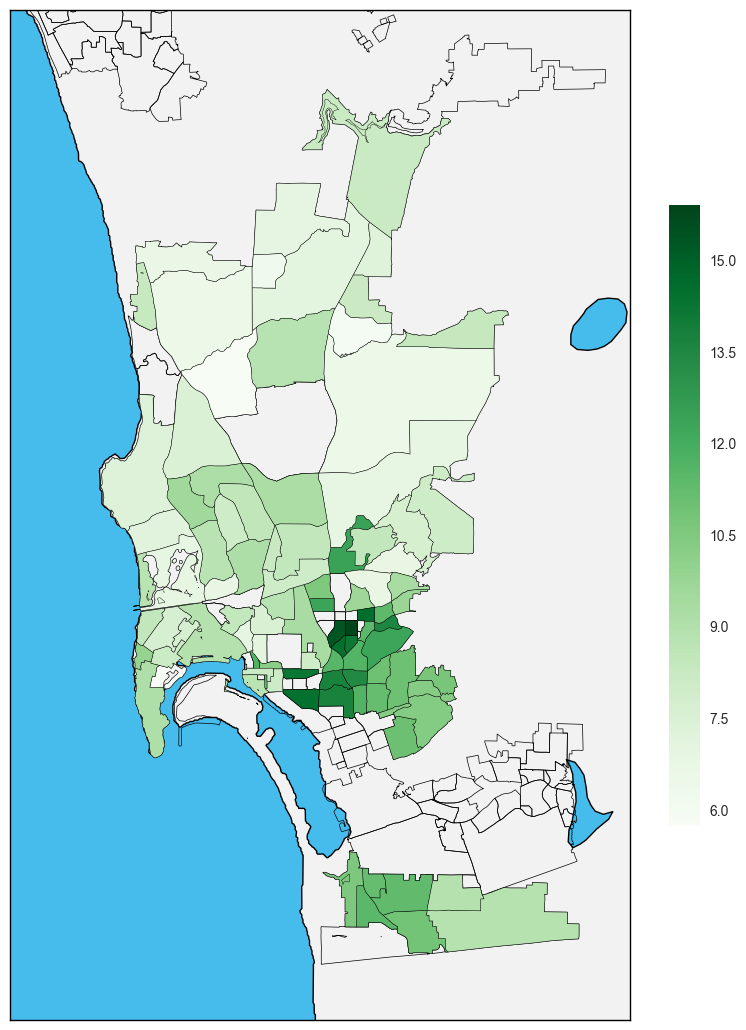

In [29]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['Change'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['Change'])
plt.colorbar(mapper, shrink=0.4)

m

# Change in Percentage of Households in Poverty per Neighborhood

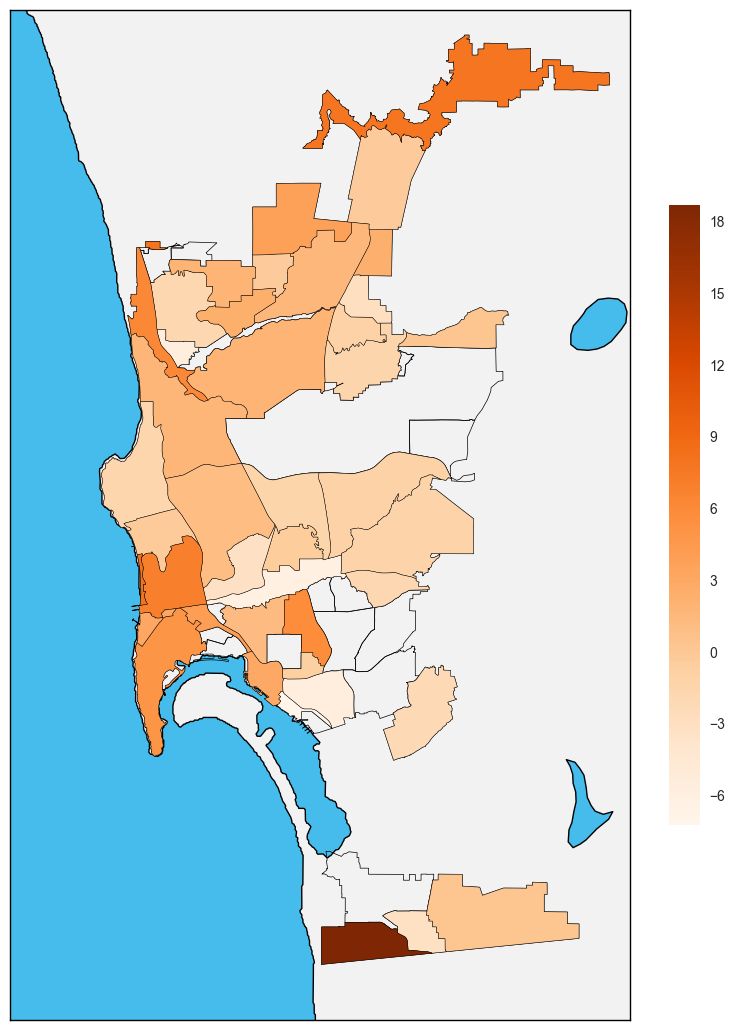

In [30]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_30k, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['change'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['change'])
plt.colorbar(mapper, shrink=0.4)

m

# Changes in Total population distribution of San Diego

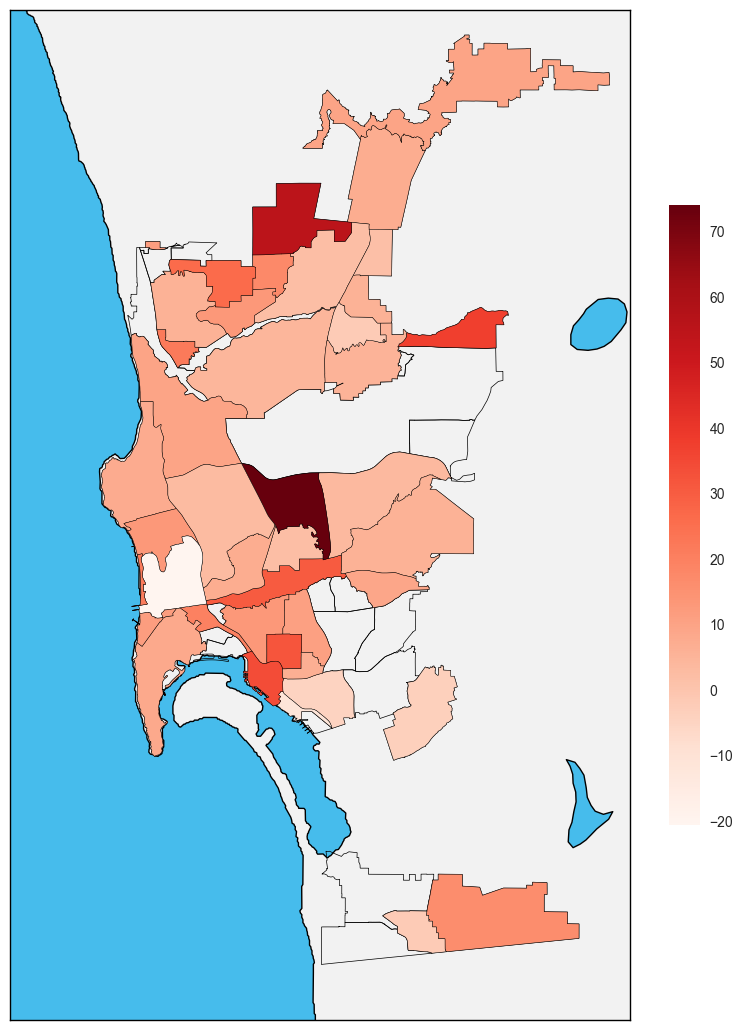

In [31]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("Alternative", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods["CPNAME"].split(',',1)[0] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(df_sort, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['net'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['net'])
plt.colorbar(mapper, shrink=0.4)

m

Now let’s try to draw some inferences from the three maps above.

The first significant area is the North-Eastern border of San Diego (Ranch Bernardo & San Pasqual)    
As we can see, In Ranch Bernardo, there is a decent amount of increase in property value, whereas there is no change in Property value in San Pasqual.
Now, looking at the income of these neighborhoods, we see a decrease of poverty in Ranch Bernardo and an increase in poverty in San Pasqual.
This could be a possible case showcasing the effects of Gentrification. It is possible that due to the increase of property value in Ranch Bernardo, lower income households moved to San Pasqual, resulting in an increase of poverty rate there. To support this hypothesis, we can look at the change of Population map and we see an increase of Population in San Pasqual.

The second significant area is the Central Area of San Diego (City heights, Balboa Park, Greater North Park)
Not surprisingly, this region had the maximum increase in property value, given it’s proximity to Downtown - the most developed regions of San Diego.
To the west and south of this area, yet again we see an increase in poverty, while in San Diego itself, poverty dicreased.
This is another possible case displaying the effects of Gentrification. Low-Income households being displaced to surrounding neighborhoods.

The third major area is the San Diego-Mexico border (Otay Mesa, Tijuana River Valley)
Looking at the property value change, there is an increase in property value in Otay Mesa and no change in Tijuana River Valley. However, looking at the poverty map, we see an increase in poverty in Tijuana River Valley. Another possible case of gentrification.

These are three neighborhoods that (likely) show gentrification.

### Bottom Line
Gentrification in San Diego has shown a significant amount of displacement of low-income population.  